## OM CHOKSI 
 

##  Bank Marketing


**Abstract:** 
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

**Data Set Information:**
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

###  Attribute Information:

####  Bank client data:

 - Age (numeric)
 - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
 - Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
 - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',  'illiterate', 'professional.course', 'university.degree', 'unknown')
 - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
 - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
 - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

    
####  Related with the last contact of the current campaign:

 - Contact: contact communication type (categorical:
   'cellular','telephone')
 - Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
   ..., 'nov', 'dec')
 - Day_of_week: last contact day of the week (categorical:
   'mon','tue','wed','thu','fri')
 - Duration: last contact duration, in seconds (numeric). Important
   note: this attribute highly affects the output target (e.g., if
   duration=0 then y='no'). Yet, the duration is not known before a call
   is performed. Also, after the end of the call y is obviously known.
   Thus, this input should only be included for benchmark purposes and
   should be discarded if the intention is to have a realistic
   predictive model.

    
####  Other attributes:

 - Campaign: number of contacts performed during this campaign and for
   this client (numeric, includes last contact)
 - Pdays: number of days that passed by after the client was last
   contacted from a previous campaign (numeric; 999 means client was not
   previously contacted)
 - Previous: number of contacts performed before this campaign and for
   this client (numeric)
 - Poutcome: outcome of the previous marketing campaign (categorical:
   'failure','nonexistent','success')

    
####  Social and economic context attributes
 - Emp.var.rate: employment variation rate - quarterly indicator
   (numeric)
 - Cons.price.idx: consumer price index - monthly indicator (numeric)
 - Cons.conf.idx: consumer confidence index - monthly indicator
   (numeric)
 - Euribor3m: euribor 3 month rate - daily indicator (numeric)
 - Nr.employed: number of employees - quarterly indicator (numeric)

####  Output variable (desired target):

 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

     
###  Source:

 - Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#


In [196]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
bank =  pd.read_csv('/kaggle/input/bank-marketing/bank-additional-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
numerical_vars = bank.select_dtypes(include=['int64', 'float64']).columns
categorical_vars = bank.select_dtypes(include=['object']).columns
all_vars = bank.columns

In [199]:
# Converting dependent variable categorical to dummy
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [200]:
# take a look at the type, number of columns, entries, null values etc..
bank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [201]:
bank.isnull().any() # one way to search for null values

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

Before removing Outliers:


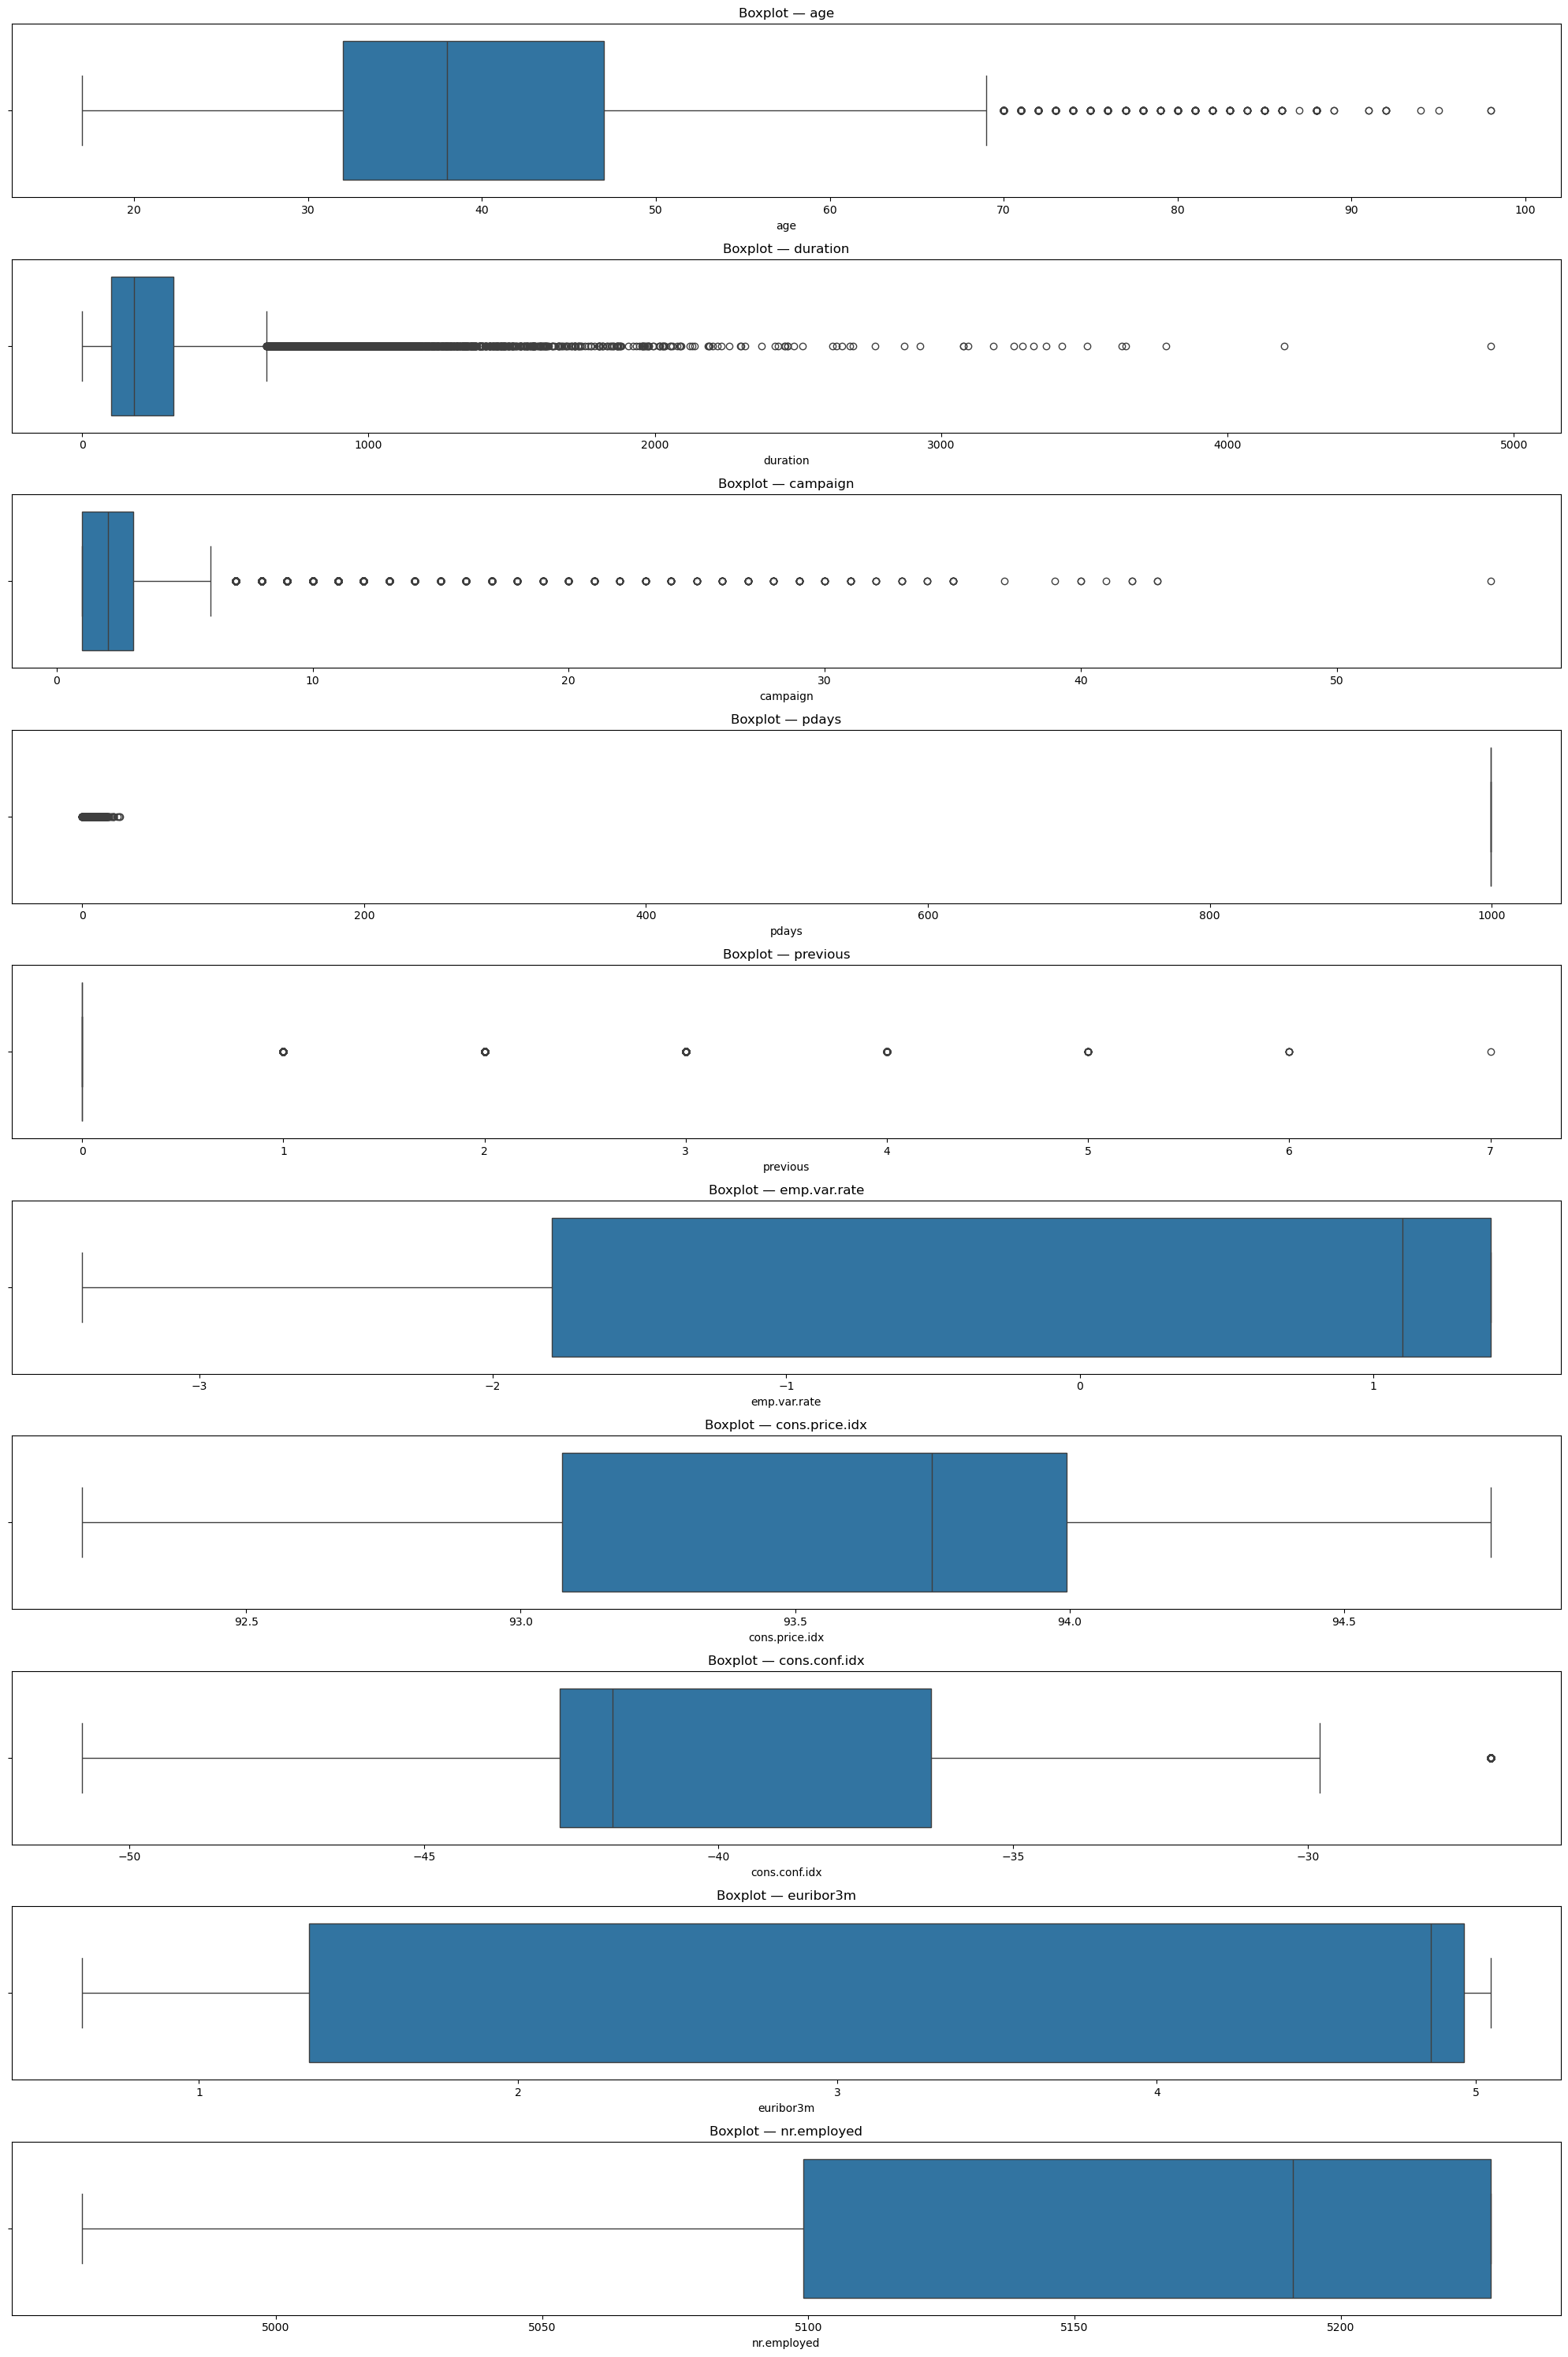

In [202]:
print("Before removing Outliers:")
plt.figure(figsize=(20, len(numerical_vars) * 3))

for idx, col in enumerate(numerical_vars, 1):
    plt.subplot(len(numerical_vars), 1, idx)
    sns.boxplot(x=bank[col])
    plt.title(f"Boxplot — {col}")

plt.tight_layout()
plt.savefig('fig/boxplots_before_outliers.png')
plt.show()

In [203]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# 1. Bank client data Analysis and Categorical Treatment
- Work with the atributes related to bank clients
- To make things more clear, i'm going to creat a new datasets that contains just this part of data

In [204]:
bank_client = bank.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


## 1.1. Knowing the categorical variables

In [205]:
# knowing the categorical variables
print('Jobs:\n', bank_client['job'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [206]:
print('Marital:\n', bank_client['marital'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']


In [207]:
print('Education:\n', bank_client['education'].unique())

Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [208]:
print('Default:\n', bank_client['default'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())

Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


In [209]:
bank_client['housing'].value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [210]:
bank_client['loan'].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [211]:
bank_client['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

## 1.2. Age
- Trying to find some insights crossing those variables

In [212]:
#Trying to find some strange values or null values
print('Min age: ', bank_client['age'].max())
print('Max age: ', bank_client['age'].min())
print('Null Values: ', bank_client['age'].isnull().any())

Min age:  98
Max age:  17
Null Values:  False


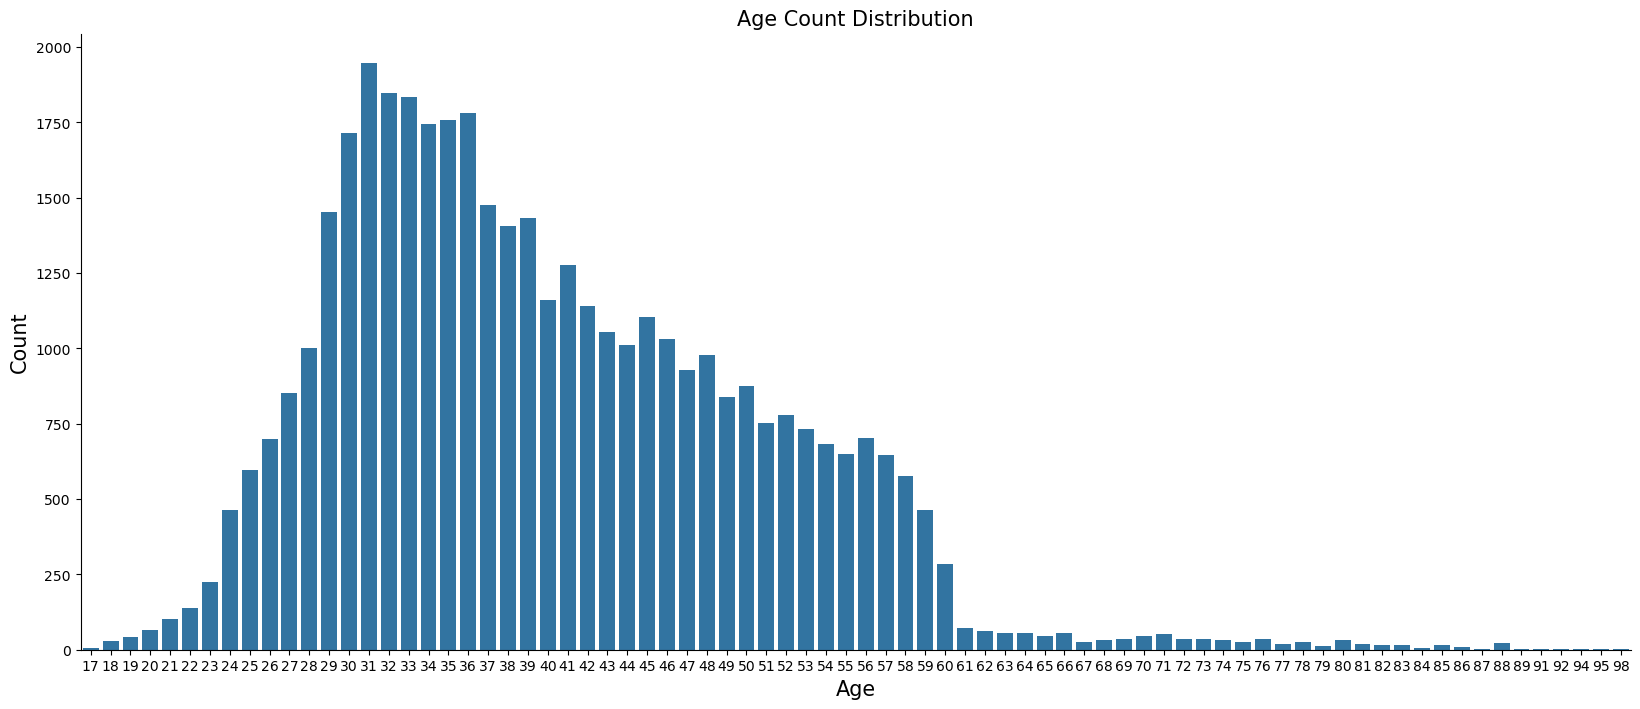

In [213]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()
plt.savefig('fig/age_count_distribution.png')

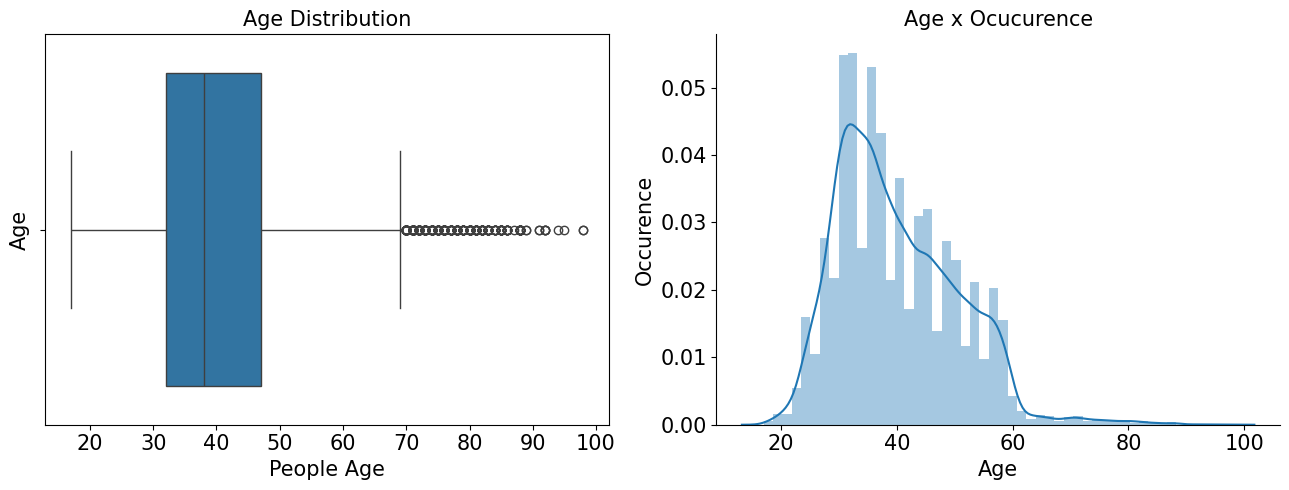

In [214]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = bank_client, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank_client['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.savefig('fig/age_distribution_boxplot_and_distplot.png')

In [215]:
# Quartiles
print('1º Quartile: ', bank_client['age'].quantile(q = 0.25))
print('2º Quartile: ', bank_client['age'].quantile(q = 0.50))
print('3º Quartile: ', bank_client['age'].quantile(q = 0.75))
print('4º Quartile: ', bank_client['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', bank_client['age'].quantile(q = 0.75) + 
                      1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above:  69.5 are outliers


In [216]:
print('Numerber of outliers: ', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Number of clients: ', len(bank_client))
#Outliers in %
print('Outliers are:', round(bank_client[bank_client['age'] > 69.6]['age'].count()*100/len(bank_client),2), '%')

Numerber of outliers:  469
Number of clients:  41188
Outliers are: 1.14 %


In [217]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(bank_client['age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(bank_client['age'].std(), 1))


MEAN: 40.0
STD : 10.4


In [218]:
# I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(bank_client['age'].std()*100/bank_client['age'].mean(), 1), ', High middle dispersion')

CV  : 26.0 , High middle dispersion


Conclusion about AGE, in my opinion due to almost high dispersion and just looking at this this graph we cannot conclude if age have a high effect to our variable y, need to keep searching for some pattern. high middle dispersion means we have people with all ages and maybe all of them can subscript a term deposit, or not.
The outliers was calculated, so my thinking is fit the model with and without them

## 1.3. JOBS

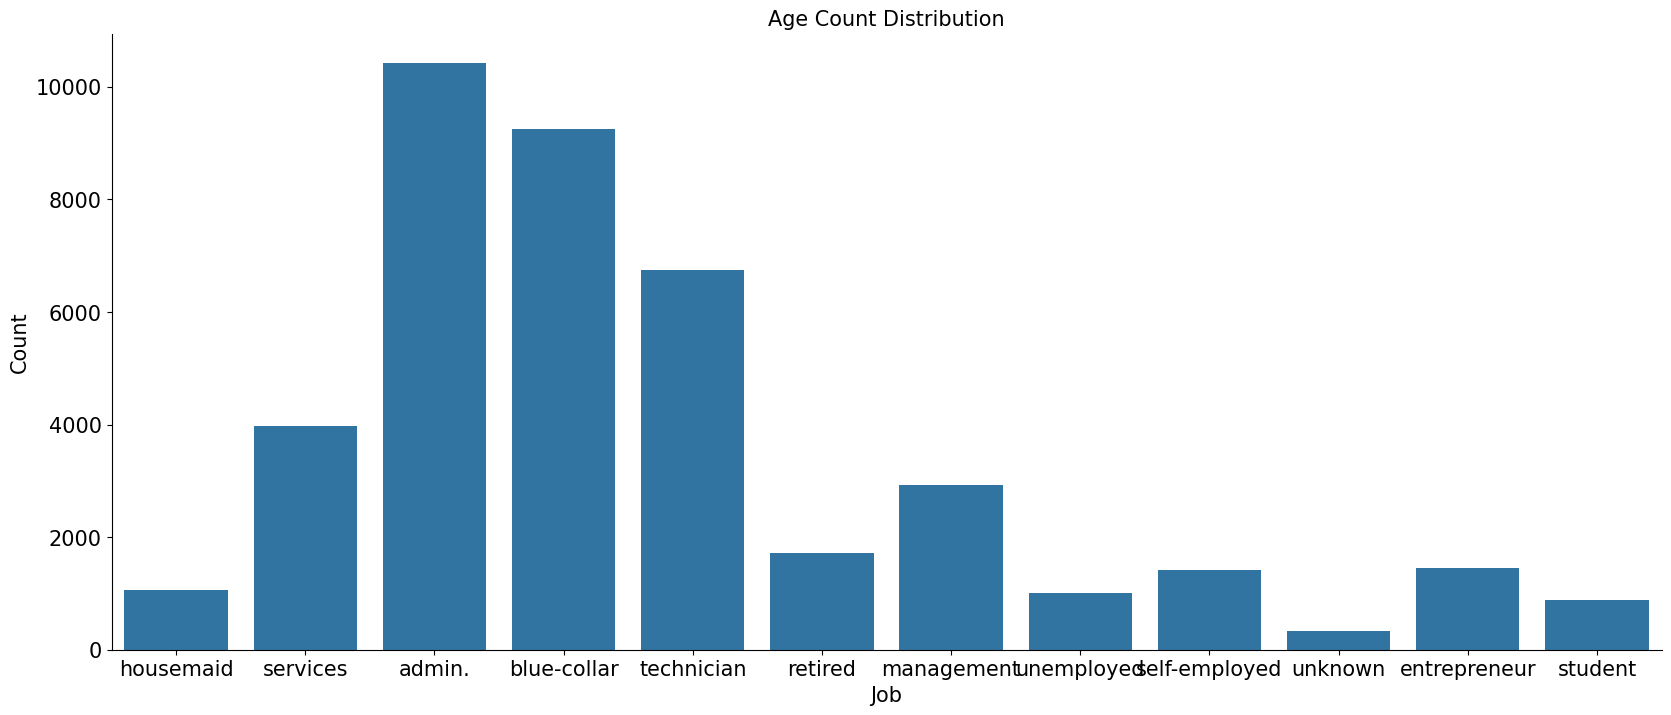

In [219]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()
plt.savefig('fig/job_count_distribution.png')

## 1.4. MARITAL

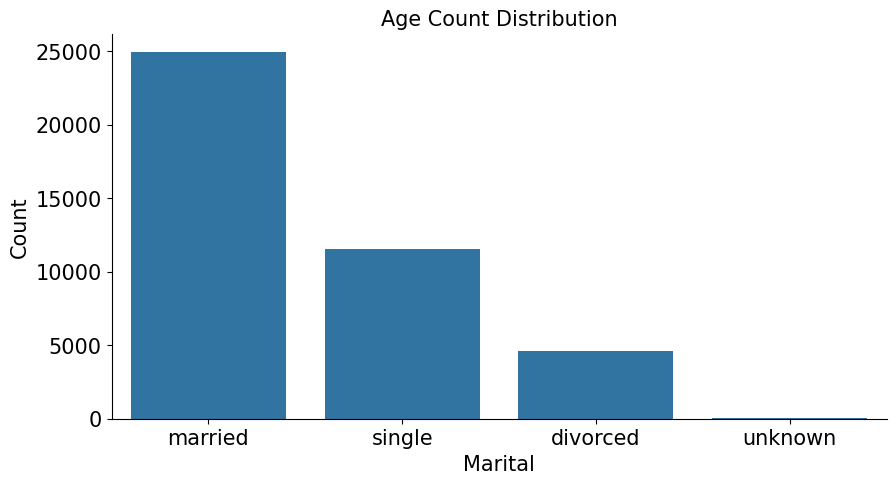

In [220]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()
plt.savefig('fig/marital_count_distribution.png')

## 1.5. EDUCATION

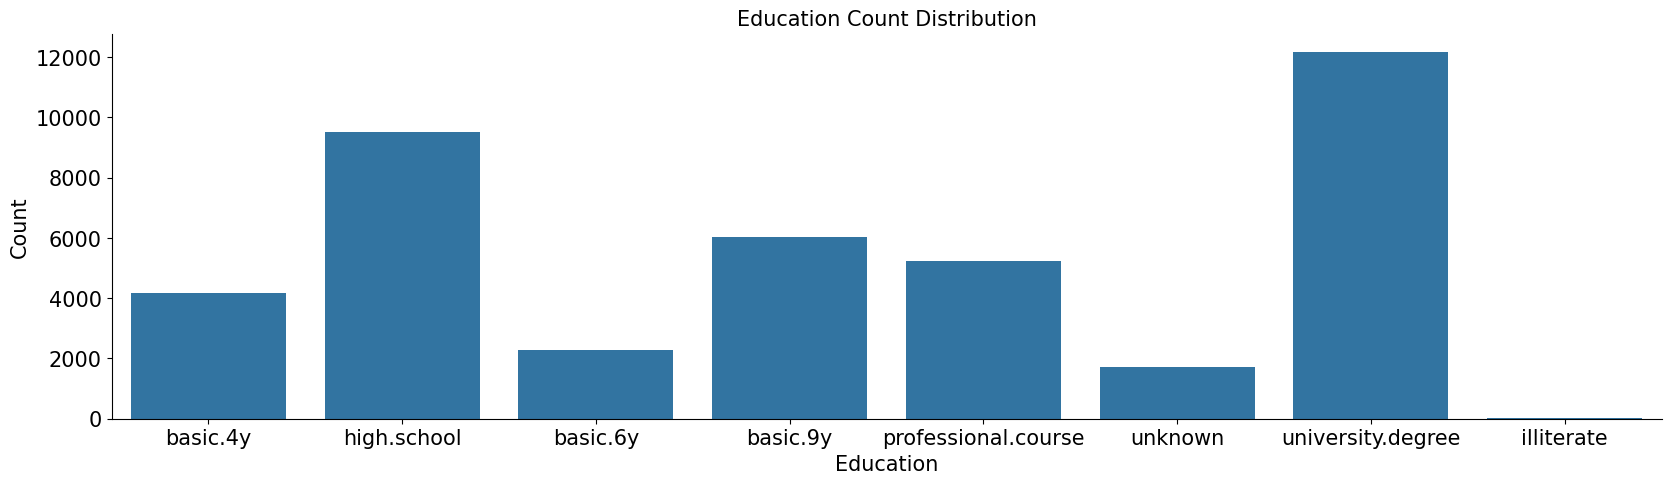

In [221]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()
plt.savefig('fig/education_count_distribution.png')

## 1.6. DEFAULT, HOUSING, LOAN

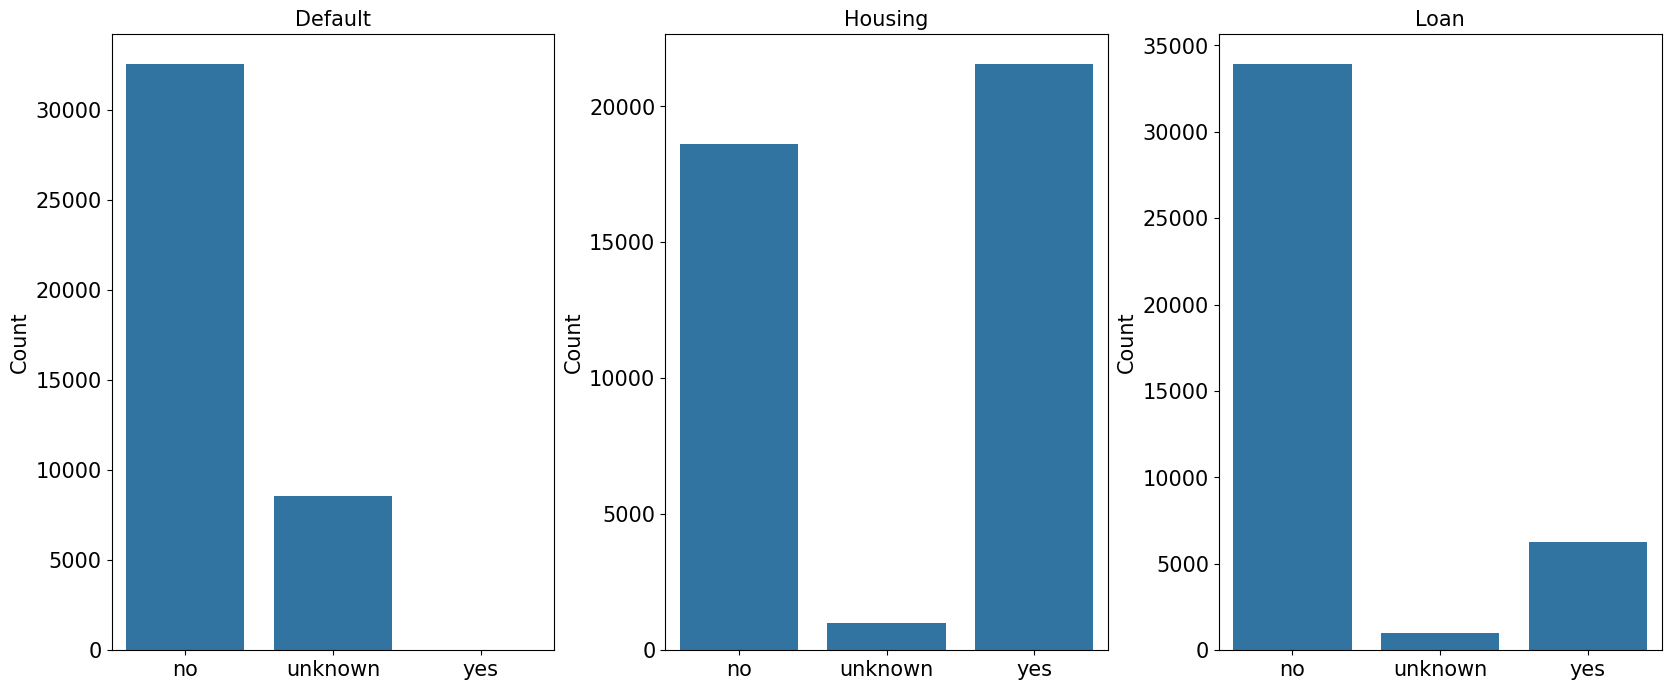

In [222]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)
plt.savefig('fig/default_housing_loan_countplots.png')

In [223]:
print('Default:\n No credit in default:'     , bank_client[bank_client['default'] == 'no']     ['age'].count(),
              '\n Unknown credit in default:', bank_client[bank_client['default'] == 'unknown']['age'].count(),
              '\n Yes to credit in default:' , bank_client[bank_client['default'] == 'yes']    ['age'].count())

Default:
 No credit in default: 32588 
 Unknown credit in default: 8597 
 Yes to credit in default: 3


In [224]:
print('Housing:\n No housing in loan:'     , bank_client[bank_client['housing'] == 'no']     ['age'].count(),
              '\n Unknown housing in loan:', bank_client[bank_client['housing'] == 'unknown']['age'].count(),
              '\n Yes to housing in loan:' , bank_client[bank_client['housing'] == 'yes']    ['age'].count())

Housing:
 No housing in loan: 18622 
 Unknown housing in loan: 990 
 Yes to housing in loan: 21576


In [225]:
print('Housing:\n No to personal loan:'     , bank_client[bank_client['loan'] == 'no']     ['age'].count(),
              '\n Unknown to personal loan:', bank_client[bank_client['loan'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , bank_client[bank_client['loan'] == 'yes']    ['age'].count())

Housing:
 No to personal loan: 33950 
 Unknown to personal loan: 990 
 Yes to personal loan: 6248


### BANK CLIENTS CONCLUSION
The ages dont mean to much, has a medium dispersion and dont make sense relate with other variables will not tell any insight

Jobs, Marital and Education i think the best analisys is just the count of each variable, if we related with the other ones its is not conclusive, all this kind of  variables has yes, unknown and no for loan, default and housing.

Default, loan and housing, its just to see the distribution of people.

## 1.7. Bank Client Categorical Treatment
- Jobs, Marital, Education, Default, Housing, Loan. Converting to continuous due the feature scaling will be apllyed later

In [226]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 

In [227]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

In [228]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


** Manualy way to convert Categorical in Continuous **
   >bank_client['job'].replace(['housemaid'   , 'services'  , 'admin.'    , 'blue-collar'  , 'technician',
                            'retired'     , 'management', 'unemployed', 'self-employed', 'unknown'   ,
                            'entrepreneur', 'student']  ,
                           [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)

   >bank_client['education'].replace(['basic.4y'           , 'high.school', 'basic.6y', 'basic.9y',
                                  'professional.course', 'unknown'    , 'university.degree'   ,
                                  'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)

   >bank_client['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace=True)
    
   >bank_client['default'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)
    
   >bank_client['housing'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)
    
   >bank_client['loan'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

** A way to Converting Categorical variables using dummies if you judge necessary **
   >bank_client = pd.get_dummies(data = bank_client, columns = ['job']      , prefix = ['job']      , drop_first = True)
   
   >bank_client = pd.get_dummies(data = bank_client, columns = ['marital']  , prefix = ['marital']  , drop_first = True)
   
   >bank_client = pd.get_dummies(data = bank_client, columns = ['education'], prefix = ['education'], drop_first = True)
   
   >bank_client = pd.get_dummies(data = bank_client, columns = ['default']  , prefix = ['default']  , drop_first = True)
   
   >bank_client = pd.get_dummies(data = bank_client, columns = ['housing']  , prefix = ['housing']  , drop_first = True)
   
   >bank_client = pd.get_dummies(data = bank_client, columns = ['loan']     , prefix = ['loan']     , drop_first = True)

In [229]:
print(bank_client.shape)
bank_client.head()

(41188, 7)


,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


# 2. Related with the last contact of the current campaign
- Treat categorical, see those values
- group continuous variables if necessary


In [230]:
# Slicing DataFrame to treat separately, make things more easy
bank_related = bank.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [231]:
bank_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [232]:
print("Kind of Contact: \n", bank_related['contact'].unique())
print("\nWhich monthis this campaing work: \n", bank_related['month'].unique())
print("\nWhich days of week this campaing work: \n", bank_related['day_of_week'].unique())

Kind of Contact: 
 ['telephone' 'cellular']

Which monthis this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


## 2.1 Duration

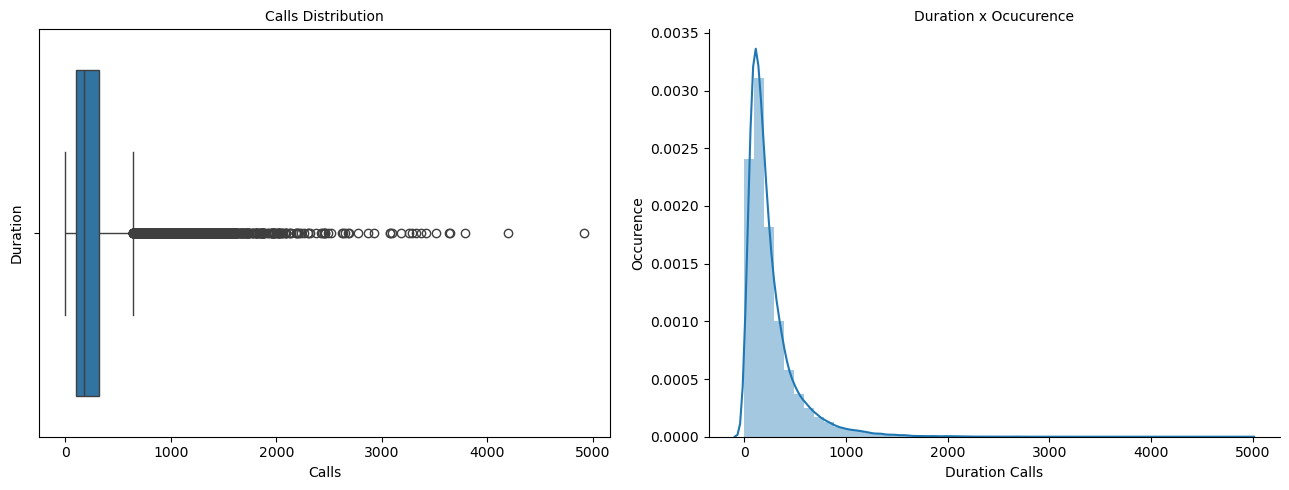

In [233]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = bank_related, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_related['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.savefig('fig/duration_boxplot_and_distplot.png')

##### PLease note: duration is different from age, Age has 78  values and Duration has 1544 different values

In [234]:
print("Max duration  call in minutes:  ", round((bank_related['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((bank_related['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((bank_related['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((bank_related['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean 

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [235]:
# Quartiles
print('1º Quartile: ', bank_related['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank_related['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank_related['duration'].quantile(q = 0.75))
print('4º Quartile: ', bank_related['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
Duration calls above:  644.5 are outliers


In [236]:
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_related))
#Outliers in %
print('Outliers are:', round(bank_related[bank_related['duration'] > 644.5]['duration'].count()*100/len(bank_related),2), '%')

Numerber of outliers:  2963
Number of clients:  41188
Outliers are: 7.19 %


In [237]:
# Look, if the call duration is iqual to 0, then is obviously that this person didn't subscribed, 
# THIS LINES NEED TO BE DELETED LATER 
bank[(bank['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


## 2.2 Contact, Month, Day of Week

In [238]:
print('Ages above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

Ages above:  644.5 are outliers


In [239]:
bank_related[bank_related['duration'] > 640].count()

contact        3008
month          3008
day_of_week    3008
duration       3008
dtype: int64

In [240]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week']) 

** A way to Converting Categorical variables using dummies if you judge necessary **
   >bank_related = pd.get_dummies(data = bank_related, prefix = ['contact']    , columns = ['contact']    , drop_first = True)
   
   >bank_related = pd.get_dummies(data = bank_related, prefix = ['month']      , columns = ['month']      , drop_first = True)
   
   >bank_related = pd.get_dummies(data = bank_related, prefix = ['day_of_week'], columns = ['day_of_week'], drop_first = True)

In [241]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307


In [242]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);

In [243]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3


# Social and economic context attributes

In [244]:
bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


# Other attributes

In [245]:
bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [246]:
bank_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [247]:
bank_o.value_counts()

campaign  pdays  previous  poutcome   
1         999    0         nonexistent    14791
2         999    0         nonexistent     8990
3         999    0         nonexistent     4772
4         999    0         nonexistent     2379
1         999    1         failure         1842
                                          ...  
39        999    0         nonexistent        1
37        999    0         nonexistent        1
1         1      6         success            1
                 4         success            1
56        999    0         nonexistent        1
Name: count, Length: 359, dtype: int64

In [248]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

After removing Outliers:


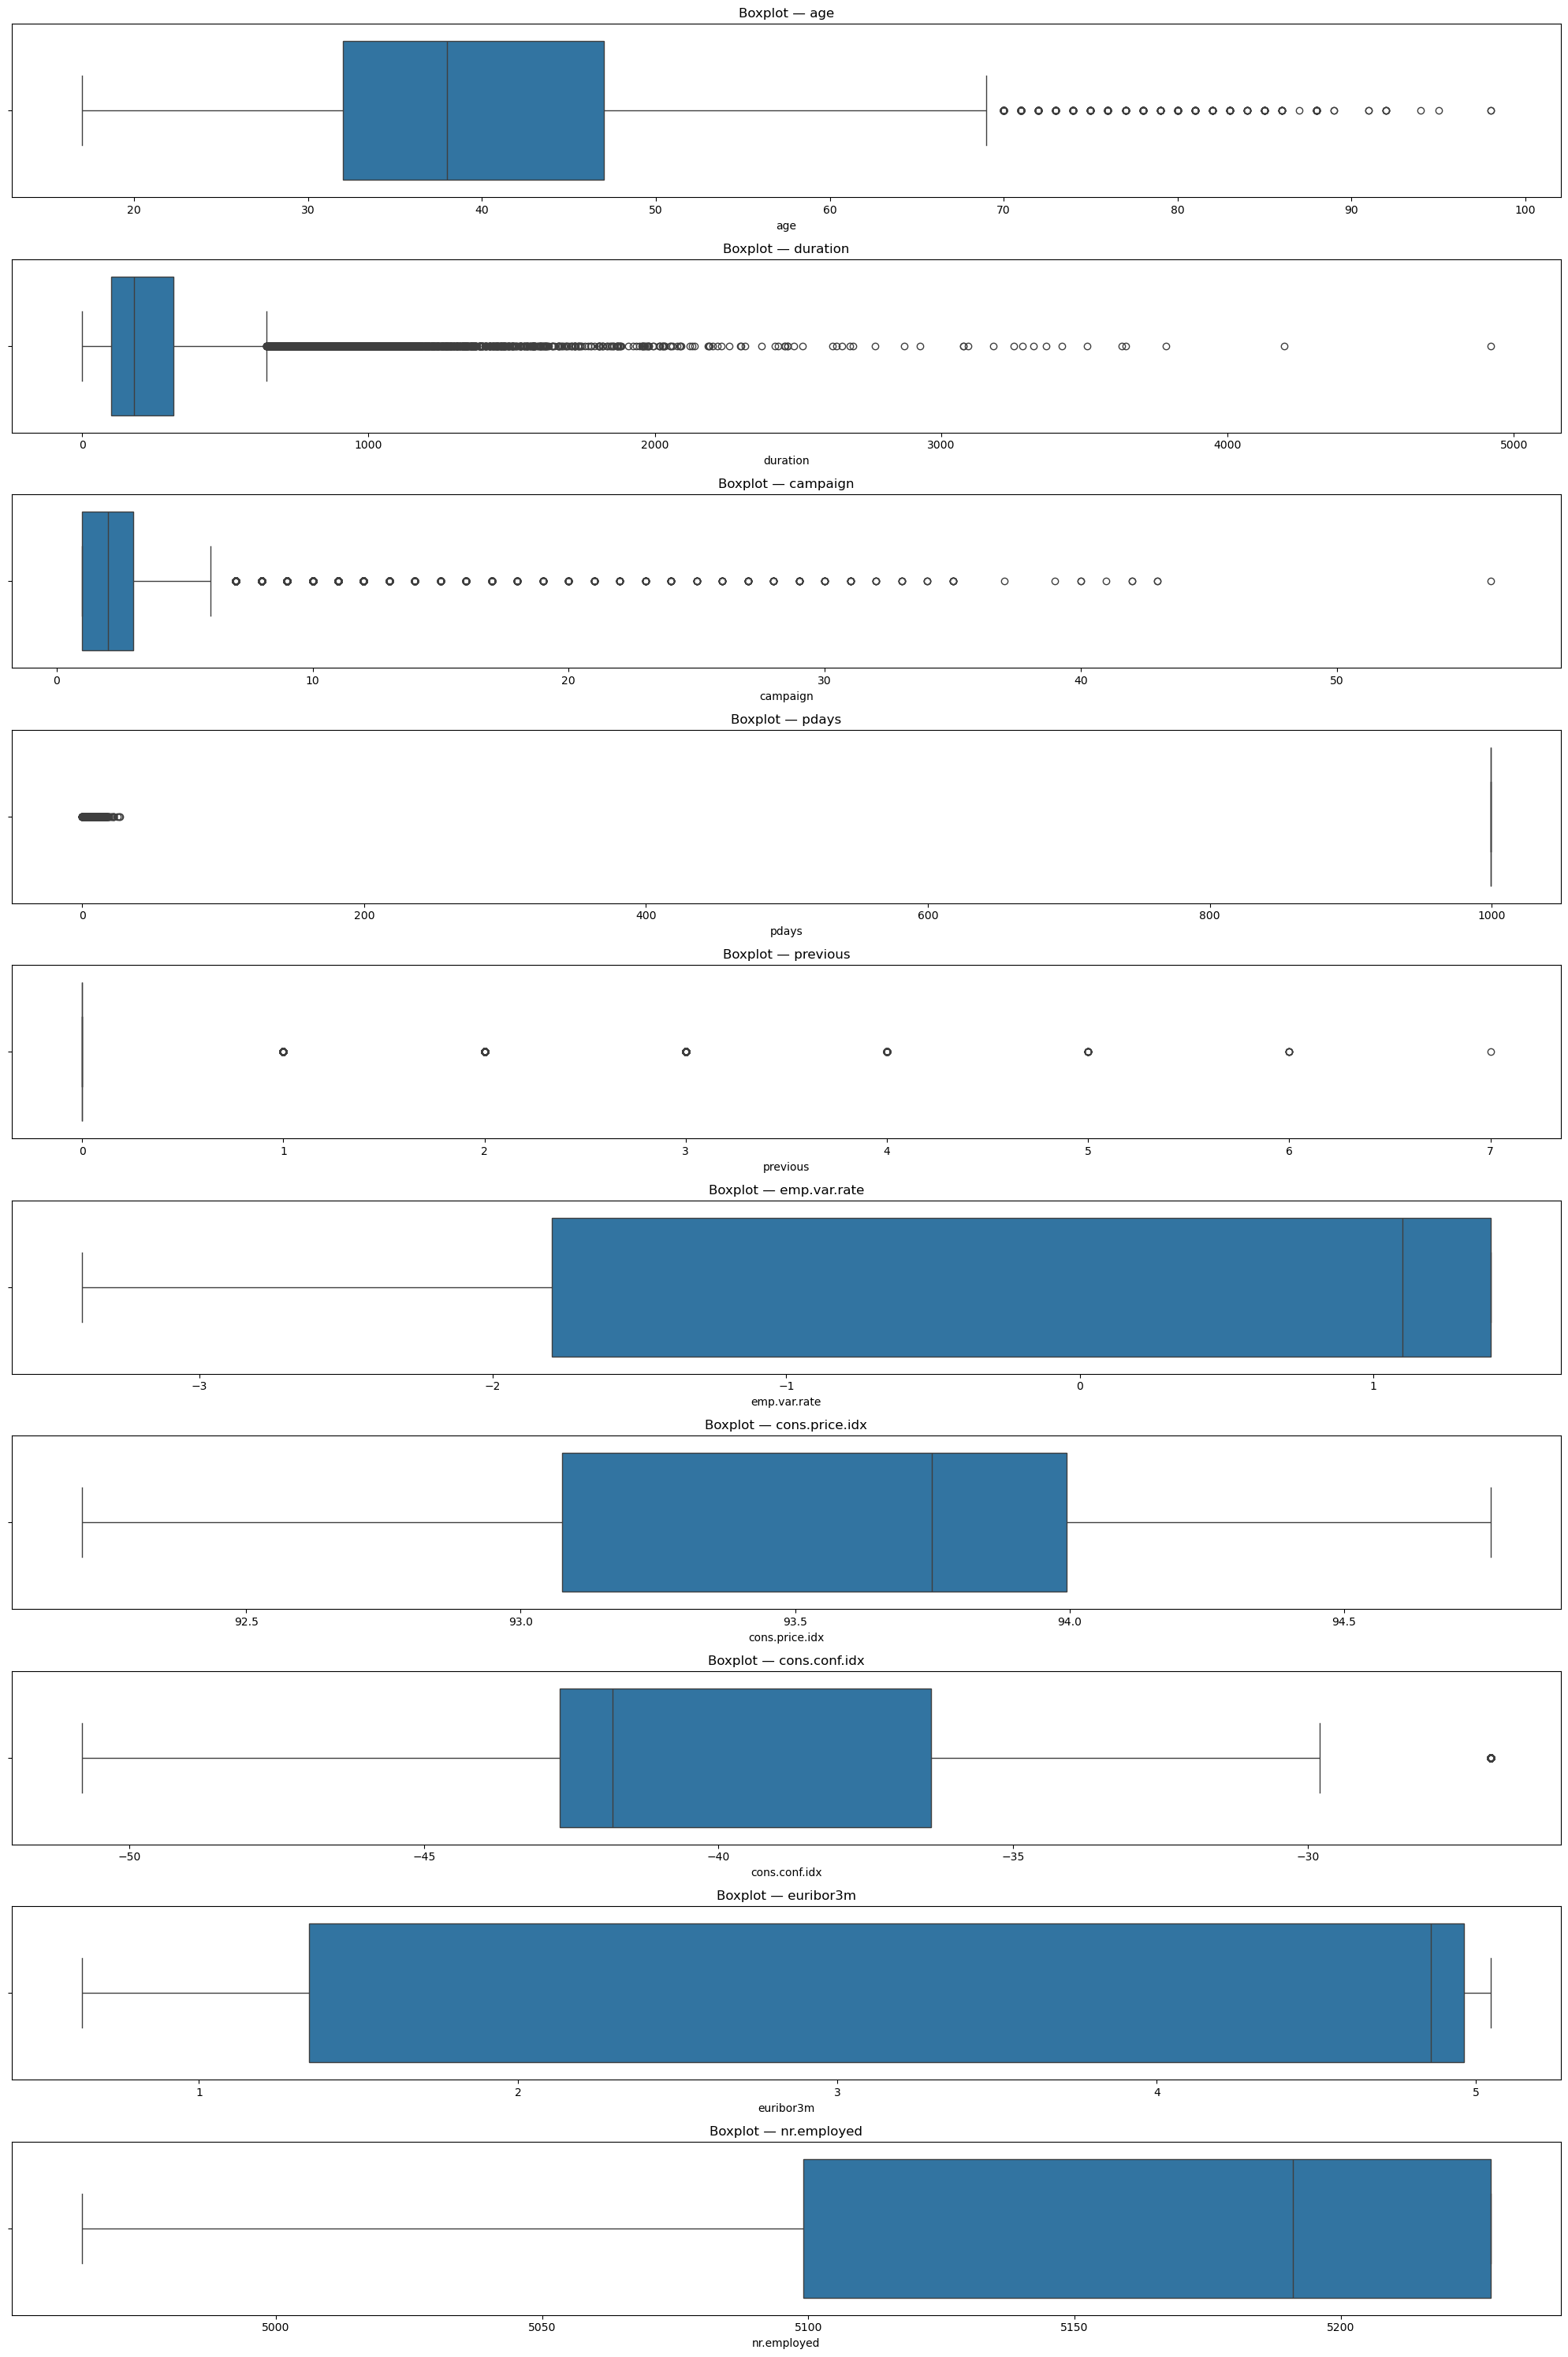

In [249]:
print("After removing Outliers:")
plt.figure(figsize=(20, len(numerical_vars) * 3))

for idx, col in enumerate(numerical_vars, 1):
    plt.subplot(len(numerical_vars), 1, idx)
    sns.boxplot(x=bank[col])
    plt.title(f"Boxplot — {col}")

plt.tight_layout()
plt.savefig('fig/boxplots_after_outliers.png')
plt.show()

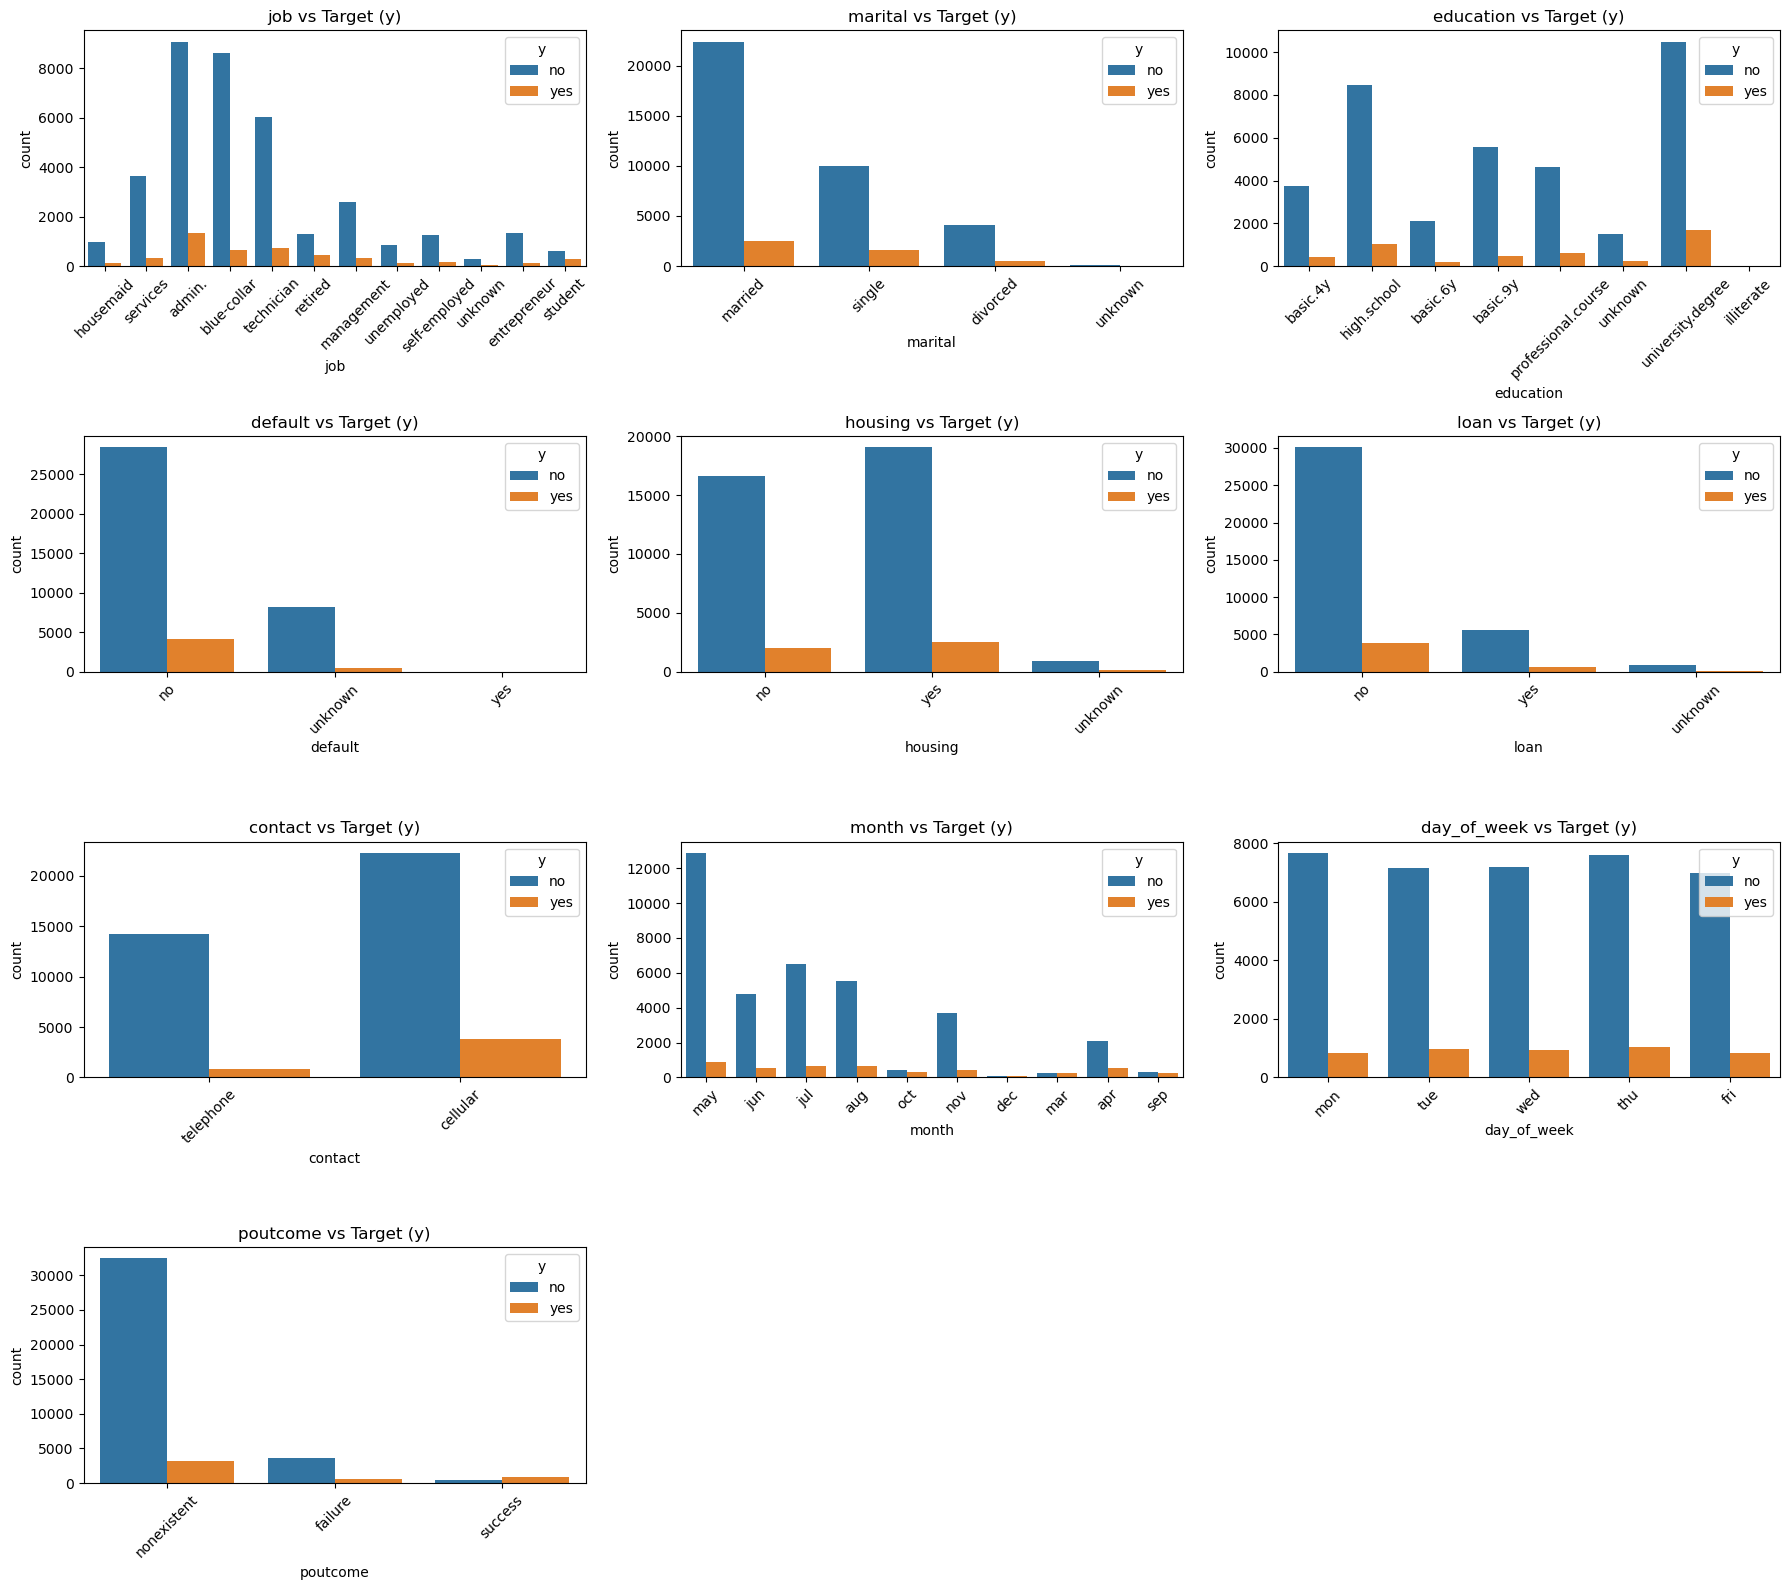

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define grid size based on number of categorical columns
n_cols = 3
n_rows = (len(categorical_vars) - 1 + n_cols - 1) // n_cols  # exclude 'y'

plt.figure(figsize=(18, 4 * n_rows))  # wider figure for multiple plots

for i, col in enumerate(categorical_vars, 1):
    if col != 'y':
        plt.subplot(n_rows, n_cols, i)
        sns.countplot(x=bank[col], hue=bank['y'])
        plt.title(f"{col} vs Target (y)")
        plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('fig/categorical_vars_vs_target.png')
plt.show()

# Model

In [251]:
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(41188, 20)

In [252]:
bank_final.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
37568,4,5,1,0,0,2,0,0,1,0,2,-2.9,92.201,-31.4,0.869,5076.2,1,999,0,1
28885,2,0,2,3,0,0,0,0,0,0,4,-1.8,93.075,-47.1,1.405,5099.1,2,999,0,1
24243,2,4,1,6,0,0,0,0,7,1,1,-0.1,93.200,-42.0,4.191,5195.8,1,999,0,1
515,1,9,1,7,1,2,0,1,6,3,3,1.1,93.994,-36.4,4.857,5191.0,2,999,0,1
18316,2,9,0,5,0,0,0,0,3,4,3,1.4,93.918,-42.7,4.963,5228.1,3,999,0,1


In [253]:
y.sample(5)

,['y']_yes
887,False
7098,False
22484,False
8968,False
6412,False


In [254]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
from sklearn.model_selection import train_test_split

In [255]:

X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.1942313295, random_state = 101)



In [256]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [257]:
X_train

array([[ 1.3892316 ,  0.35767721, -0.28379086, ..., -5.09411565,
         5.69089706,  3.98380499],
       [ 0.02789292,  0.91469431, -0.28379086, ...,  0.19692629,
        -0.35195982, -0.37510705],
       [-1.33344575,  0.07916867, -0.28379086, ...,  0.19692629,
        -0.35195982, -0.37510705],
       ...,
       [ 0.02789292,  2.02872851, -0.28379086, ...,  0.19692629,
        -0.35195982, -0.37510705],
       [ 0.02789292, -0.75635698, -0.28379086, ...,  0.19692629,
        -0.35195982, -0.37510705],
       [ 0.02789292, -0.75635698, -0.28379086, ...,  0.19692629,
        -0.35195982, -0.37510705]], shape=(33188, 20))

In [258]:
X_test

array([[-1.33344575,  0.91469431, -0.28379086, ...,  0.19692629,
        -0.35195982, -0.37510705],
       [ 1.3892316 ,  1.47171141,  1.35591163, ...,  0.19692629,
        -0.35195982, -0.37510705],
       [ 0.02789292,  0.07916867,  1.35591163, ...,  0.19692629,
        -0.35195982, -0.37510705],
       ...,
       [ 0.02789292, -0.75635698, -0.28379086, ...,  0.19692629,
        -0.35195982, -0.37510705],
       [ 0.02789292,  1.47171141,  1.35591163, ...,  0.19692629,
        -0.35195982, -0.37510705],
       [ 1.3892316 , -0.75635698, -0.28379086, ...,  0.19692629,
        -0.35195982, -0.37510705]], shape=(8000, 20))

In [259]:
y_train,y_test

(       ['y']_yes
 38912       True
 9455       False
 14153       True
 25021      False
 30911      False
 ...          ...
 12363      False
 5695       False
 8006       False
 17745      False
 17931      False
 
 [33188 rows x 1 columns],
        ['y']_yes
 3669       False
 20131      False
 2492       False
 14088      False
 34986      False
 ...          ...
 24463      False
 10055      False
 8222       False
 1488       False
 20782      False
 
 [8000 rows x 1 columns])

In [260]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [261]:
# Train and predict
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)

In [262]:
pd.Series(logpred).value_counts()

False    7507
True      493
Name: count, dtype: int64

In [263]:
y_test.value_counts()

['y']_yes
False        7073
True          927
Name: count, dtype: int64

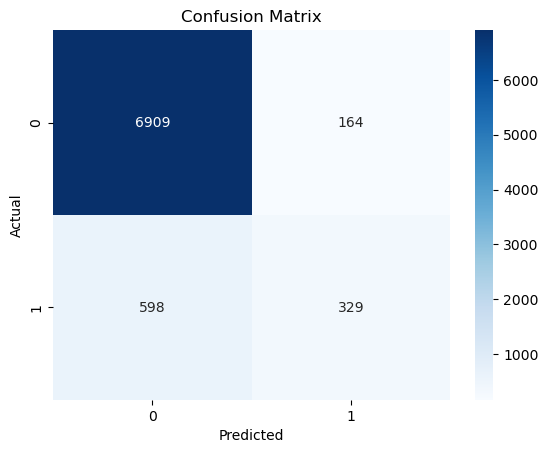

In [264]:
# Confusion matrix heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, logpred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') 
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('fig/confusion_matrix_logistic.png')
plt.show()

In [265]:
# Accuracy
print("Accuracy:", round(accuracy_score(y_test, logpred) * 100, 2), "%")

# Cross-validation score
LOGCV = cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
print("Cross-validated Accuracy:", round(LOGCV * 100, 2), "%")

Accuracy: 90.48 %
Cross-validated Accuracy: 90.97 %
Cross-validated Accuracy: 90.97 %


In [266]:
print(classification_report(y_test,logpred))

              precision    recall  f1-score   support

       False       0.92      0.98      0.95      7073
        True       0.67      0.35      0.46       927

    accuracy                           0.90      8000
   macro avg       0.79      0.67      0.71      8000
weighted avg       0.89      0.90      0.89      8000



k=1 87.80 (+/- 0.49)
k=2 89.71 (+/- 0.47)
k=2 89.71 (+/- 0.47)
k=3 89.59 (+/- 0.33)
k=3 89.59 (+/- 0.33)
k=4 89.97 (+/- 0.49)
k=4 89.97 (+/- 0.49)
k=5 90.01 (+/- 0.41)
k=5 90.01 (+/- 0.41)
k=6 90.19 (+/- 0.45)
k=6 90.19 (+/- 0.45)
k=7 90.24 (+/- 0.39)
k=7 90.24 (+/- 0.39)
k=8 90.33 (+/- 0.41)
k=8 90.33 (+/- 0.41)
k=9 90.38 (+/- 0.32)
k=9 90.38 (+/- 0.32)
k=10 90.35 (+/- 0.32)
k=10 90.35 (+/- 0.32)
k=11 90.41 (+/- 0.35)
k=11 90.41 (+/- 0.35)
k=12 90.40 (+/- 0.38)
k=12 90.40 (+/- 0.38)
k=13 90.42 (+/- 0.32)
k=13 90.42 (+/- 0.32)
k=14 90.41 (+/- 0.42)
k=14 90.41 (+/- 0.42)
k=15 90.48 (+/- 0.39)
k=15 90.48 (+/- 0.39)
k=16 90.39 (+/- 0.37)
k=16 90.39 (+/- 0.37)
k=17 90.49 (+/- 0.35)
k=17 90.49 (+/- 0.35)
k=18 90.39 (+/- 0.37)
k=18 90.39 (+/- 0.37)
k=19 90.47 (+/- 0.30)
k=19 90.47 (+/- 0.30)
k=20 90.40 (+/- 0.31)
k=20 90.40 (+/- 0.31)
k=21 90.44 (+/- 0.36)
k=21 90.44 (+/- 0.36)
k=22 90.40 (+/- 0.33)
k=22 90.40 (+/- 0.33)
k=23 90.44 (+/- 0.34)
k=23 90.44 (+/- 0.34)
k=24 90.39 (+/- 0.33)
k=24 

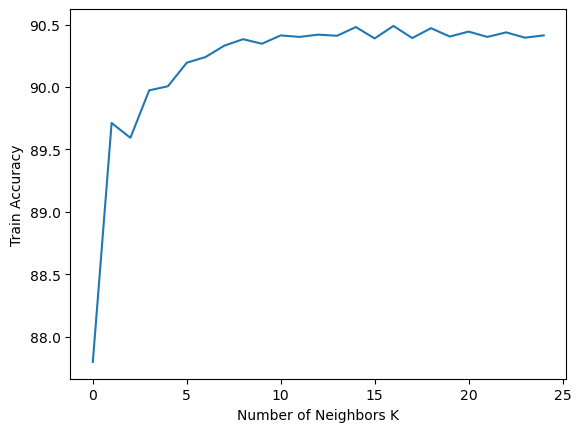

In [267]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_trainK, X_testK, y_trainK, y_testK = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.savefig('fig/knn_cv_scores.png')
plt.show()

In [268]:

# Train KNN with 22 neighbors
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, knnpred))

# Accuracy on test set
test_acc = round(accuracy_score(y_test, knnpred) * 100, 2)
print("Test Accuracy:", test_acc, "%")

# Cross-validation accuracy
KNNCV = cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
cv_acc = round(KNNCV * 100, 2)
print("Cross-validated Accuracy:", cv_acc, "%")

# Final summary
print(f"\nFinal Results → Test Accuracy: {test_acc}% | Cross-validated Accuracy: {cv_acc}%")

Confusion Matrix:
 [[6962  111]
 [ 684  243]]
Test Accuracy: 90.06 %
Cross-validated Accuracy: 90.48 %

Final Results → Test Accuracy: 90.06% | Cross-validated Accuracy: 90.48%
Cross-validated Accuracy: 90.48 %

Final Results → Test Accuracy: 90.06% | Cross-validated Accuracy: 90.48%


In [269]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, svcpred))

# Accuracy on test set
test_acc = round(accuracy_score(y_test, svcpred) * 100, 2)
print("Accuracy:", test_acc, "%")

# Cross-validation accuracy
SVCCV = cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
cv_acc = round(SVCCV * 100, 2)
print(f"Cross-validation Accuracy: {cv_acc}%")


Confusion Matrix:
 [[6531  542]
 [ 584  343]]
Accuracy: 85.92 %
Cross-validation Accuracy: 85.56%
Cross-validation Accuracy: 85.56%


In [270]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Train Decision Tree
dtree = DecisionTreeClassifier(criterion='gini')  # you can also try criterion='entropy'
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, dtreepred))

# Accuracy on test set
test_acc = round(accuracy_score(y_test, dtreepred) * 100, 2)
print("Test Accuracy:", test_acc, "%")

# Cross-validation accuracy
DTREECV = cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
cv_acc = round(DTREECV * 100, 2)
print("Cross-validation Accuracy:", cv_acc, "%")

# Final summary
print(f"\nFinal Results → Test Accuracy: {test_acc}% | Cross-validation Accuracy: {cv_acc}%")

Confusion Matrix:
 [[6603  470]
 [ 481  446]]
Test Accuracy: 88.11 %
Cross-validation Accuracy: 88.39 %

Final Results → Test Accuracy: 88.11% | Cross-validation Accuracy: 88.39%
Cross-validation Accuracy: 88.39 %

Final Results → Test Accuracy: 88.11% | Cross-validation Accuracy: 88.39%


In [271]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Train Random Forest
rfc = RandomForestClassifier(n_estimators=200, criterion='gini', random_state=123)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, rfcpred))

# Accuracy on test set
test_acc = round(accuracy_score(y_test, rfcpred) * 100, 2)
print("Test Accuracy:", test_acc, "%")

# Cross-validation accuracy
RFCCV = cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
cv_acc = round(RFCCV * 100, 2)
print("Cross-validation Accuracy:", cv_acc, "%")

# Final summary
print(f"\nFinal Results → Test Accuracy: {test_acc}% | Cross-validation Accuracy: {cv_acc}%")

Confusion Matrix:
 [[6799  274]
 [ 486  441]]
Test Accuracy: 90.5 %
Cross-validation Accuracy: 91.0 %

Final Results → Test Accuracy: 90.5% | Cross-validation Accuracy: 91.0%
Cross-validation Accuracy: 91.0 %

Final Results → Test Accuracy: 90.5% | Cross-validation Accuracy: 91.0%


In [272]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Train Gaussian Naive Bayes
gaussiannb = GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)

# Probabilities (optional)
probs = gaussiannb.predict_proba(X_test)

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, gaussiannbpred))

# Accuracy on test set
test_acc = round(accuracy_score(y_test, gaussiannbpred) * 100, 2)
print("Test Accuracy:", test_acc, "%")

# Cross-validation accuracy
GAUSIAN = cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
cv_acc = round(GAUSIAN * 100, 2)
print("Cross-validation Accuracy:", cv_acc, "%")

# Final summary
print(f"\nFinal Results → Test Accuracy: {test_acc}% | Cross-validation Accuracy: {cv_acc}%")

Confusion Matrix:
 [[6272  801]
 [ 417  510]]
Test Accuracy: 84.78 %
Cross-validation Accuracy: 84.44 %

Final Results → Test Accuracy: 84.78% | Cross-validation Accuracy: 84.44%
Cross-validation Accuracy: 84.44 %

Final Results → Test Accuracy: 84.78% | Cross-validation Accuracy: 84.44%


In [273]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # suppress warnings
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, xgbprd))

# Accuracy on test set
test_acc = round(accuracy_score(y_test, xgbprd) * 100, 2)
print("Test Accuracy:", test_acc, "%")

# Cross-validation accuracy
XGB = cross_val_score(estimator=xgb, X=X_train, y=y_train, cv=10, scoring='accuracy').mean()
cv_acc = round(XGB * 100, 2)
print("Cross-validation Accuracy:", cv_acc, "%")

# Final summary
print(f"\nFinal Results → Test Accuracy: {test_acc}% | Cross-validation Accuracy: {cv_acc}%")

Confusion Matrix:
 [[6805  268]
 [ 458  469]]
Test Accuracy: 90.92 %
Cross-validation Accuracy: 91.05 %

Final Results → Test Accuracy: 90.92% | Cross-validation Accuracy: 91.05%
Cross-validation Accuracy: 91.05 %

Final Results → Test Accuracy: 90.92% | Cross-validation Accuracy: 91.05%


In [274]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Train Gradient Boosting
gbk = GradientBoostingClassifier(random_state=123)
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, gbkpred))

# Accuracy on test set
test_acc = round(accuracy_score(y_test, gbkpred) * 100, 2)
print("Test Accuracy:", test_acc, "%")

# Cross-validation accuracy
GBKCV = cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
cv_acc = round(GBKCV * 100, 2)
print("Cross-validation Accuracy:", cv_acc, "%")

# Final summary
print(f"\nFinal Results → Test Accuracy: {test_acc}% | Cross-validation Accuracy: {cv_acc}%")

Confusion Matrix:
 [[6826  247]
 [ 460  467]]
Test Accuracy: 91.16 %
Cross-validation Accuracy: 91.43 %

Final Results → Test Accuracy: 91.16% | Cross-validation Accuracy: 91.43%
Cross-validation Accuracy: 91.43 %

Final Results → Test Accuracy: 91.16% | Cross-validation Accuracy: 91.43%


In [275]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
7,Gradient Boosting,0.914306
6,XGBoost,0.910510
0,Random Forest Classifier,0.910028
4,Logistic Model,0.909696
3,K-Near Neighbors,0.904815
1,Decision Tree Classifier,0.883873
2,Support Vector Machine,0.855550
5,Gausian NB,0.844432


**Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test.**

**A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system:**

.90-1 = excellent (A)

.80-.90 = good (B)

.70-.80 = fair (C)

.60-.70 = poor (D)

.50-.60 = fail (F)

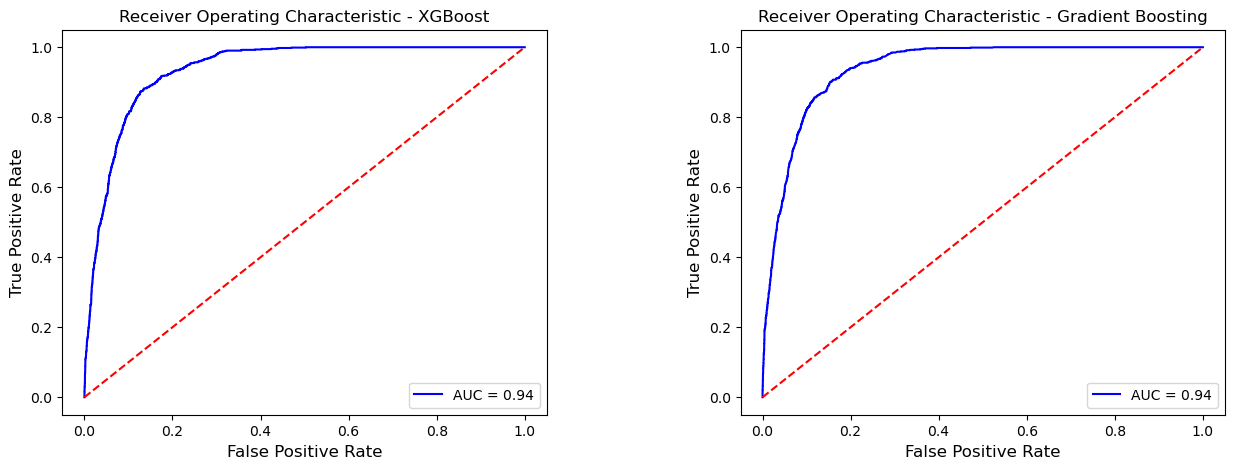

In [276]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Create subplots for side-by-side ROC curves
fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# --- XGBoost ROC/AUC ---
probs_xgb = xgb.predict_proba(X_test)
preds_xgb = probs_xgb[:, 1]
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test, preds_xgb)
roc_auc_xgb = metrics.auc(fpr_xgb, tpr_xgb)

ax.plot(fpr_xgb, tpr_xgb, 'b', label=f'AUC = {roc_auc_xgb:.2f}')
ax.plot([0, 1], [0, 1], 'r--')
ax.set_title('Receiver Operating Characteristic - XGBoost', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.legend(loc='lower right', prop={'size': 10})

# --- Gradient Boosting ROC/AUC ---
probs_gbk = gbk.predict_proba(X_test)
preds_gbk = probs_gbk[:, 1]
fpr_gbk, tpr_gbk, _ = metrics.roc_curve(y_test, preds_gbk)
roc_auc_gbk = metrics.auc(fpr_gbk, tpr_gbk)

ax1.plot(fpr_gbk, tpr_gbk, 'b', label=f'AUC = {roc_auc_gbk:.2f}')
ax1.plot([0, 1], [0, 1], 'r--')
ax1.set_title('Receiver Operating Characteristic - Gradient Boosting', fontsize=12)
ax1.set_ylabel('True Positive Rate', fontsize=12)
ax1.set_xlabel('False Positive Rate', fontsize=12)
ax1.legend(loc='lower right', prop={'size': 10})

# Adjust spacing
plt.subplots_adjust(wspace=0.4)
plt.savefig('fig/roc_curves_xgb_and_gbk.png')
plt.show()

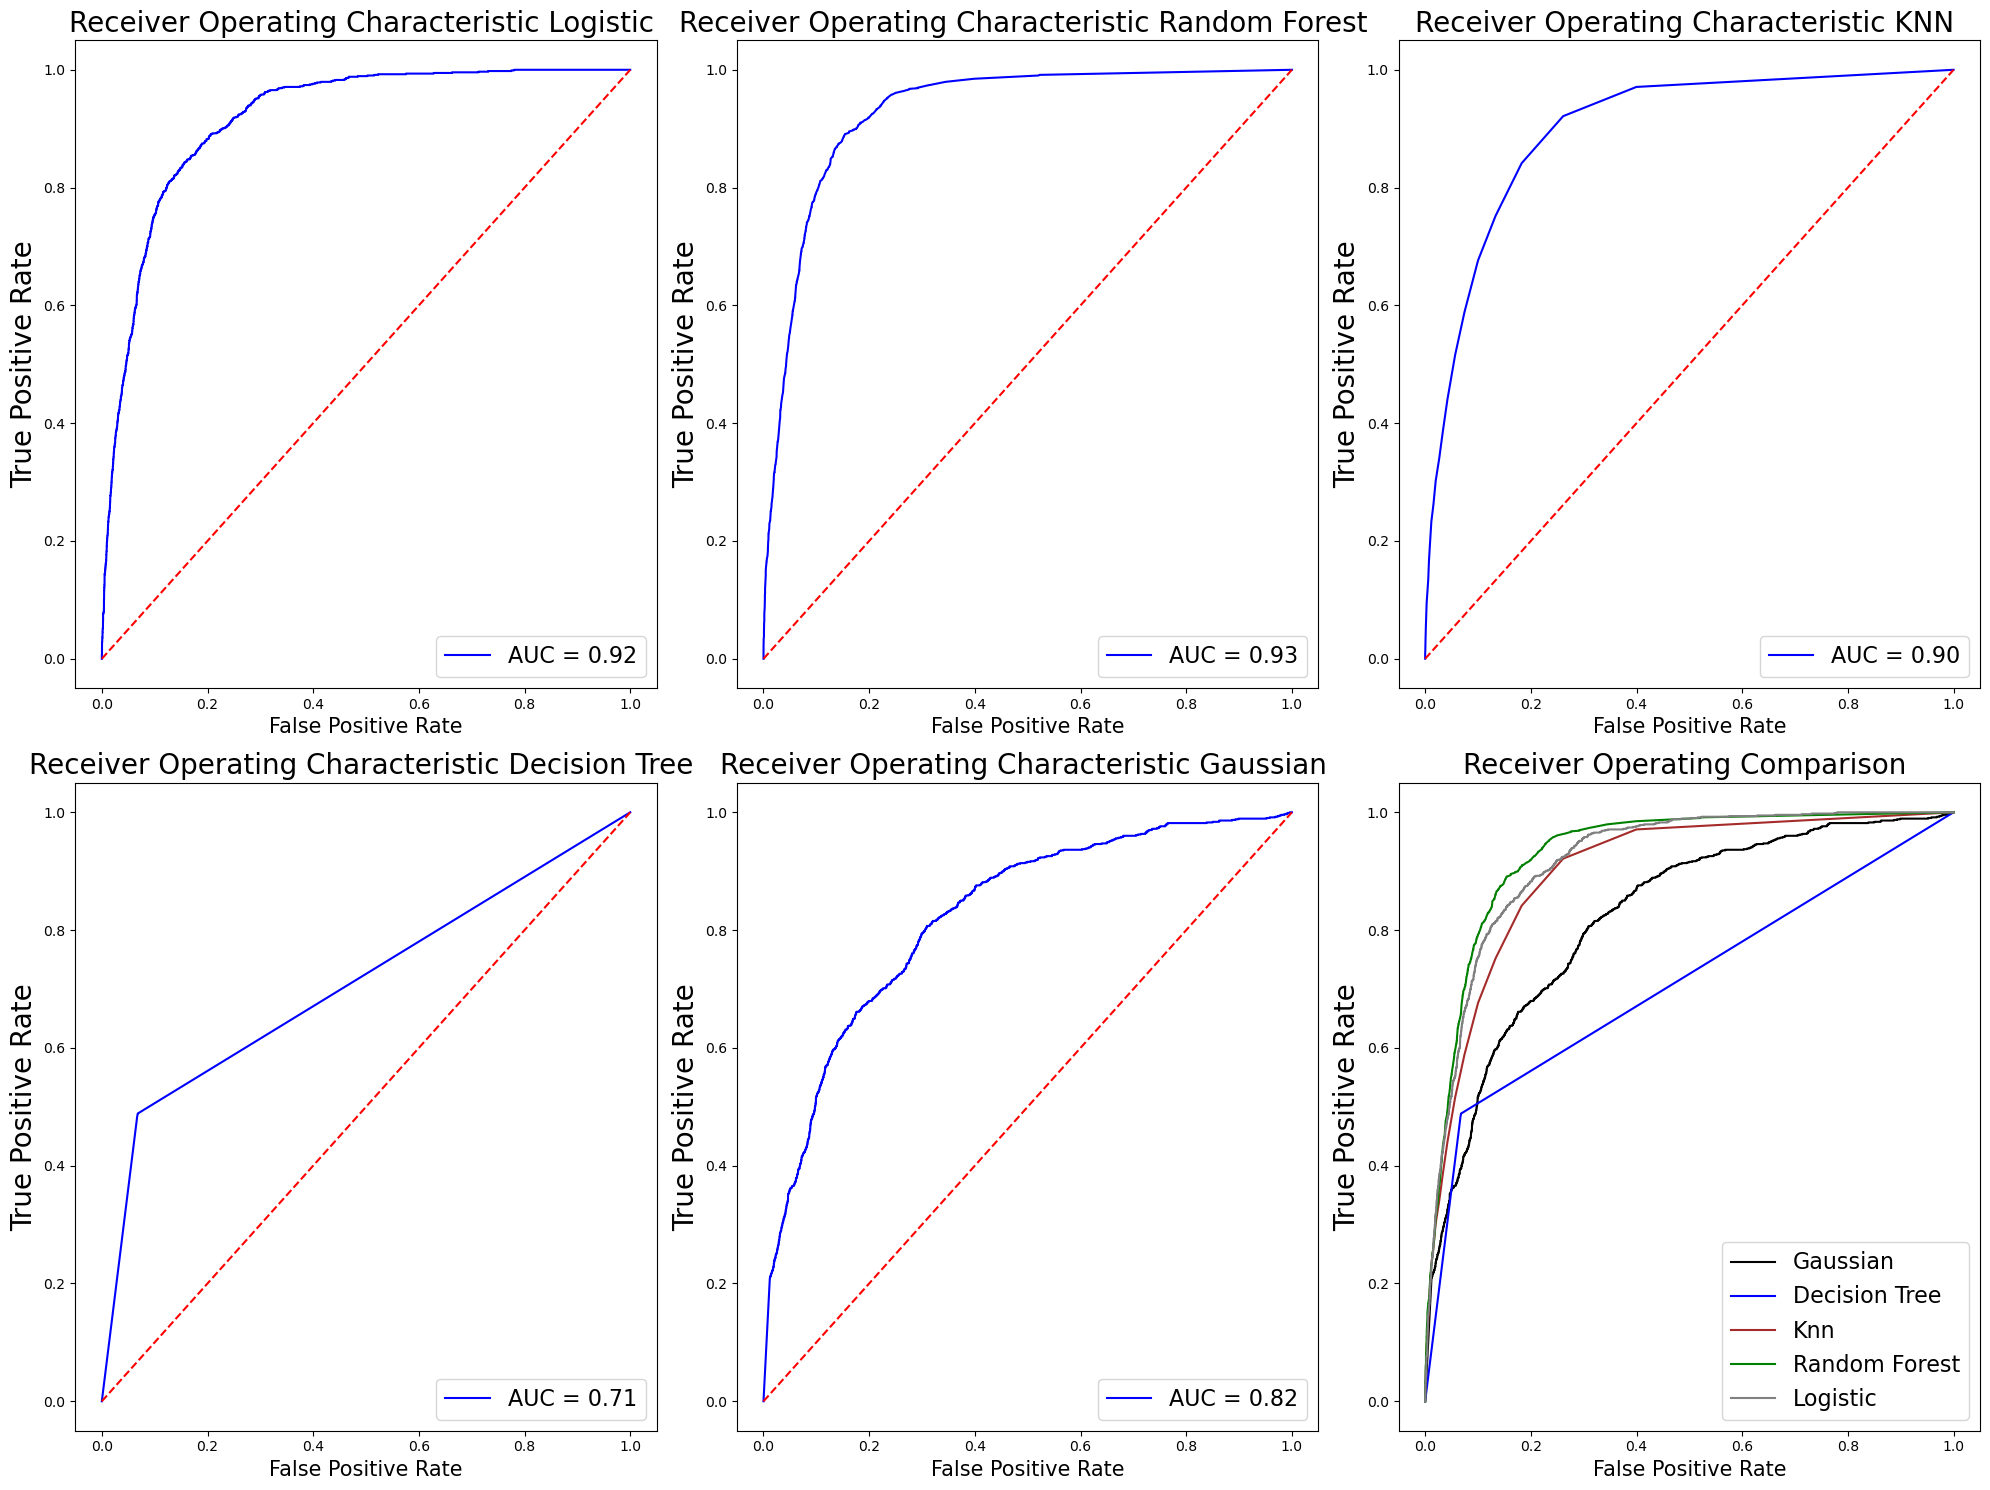

In [277]:
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#GAUSSIAN ---------------------
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 
plt.savefig('fig/roc_curves_all_models.png')

# ANALYZING THE RESULTS

**So now we have to decide which one is the best model, and we have two types of wrong values:**
- False Positive, means the client do NOT SUBSCRIBED to term deposit, but the model thinks he did.
- False Negative, means the client SUBSCRIBED to term deposit, but the model said he dont.

**In my opinion:**
- The first one its most harmful, because we think that we already have that client but we dont and maybe we lost him in other future campaings 
- The second its not good but its ok, we have that client and in the future we'll discovery that in truth he's already our client

### So, our objective here, is to find the best model by confusion matrix with the lowest False Positive as possible.
Obs1 - lets go back and look the best confusion matrix that attend this criteria
Obs2 - i'll do the math manualy to be more visible and understanding

In [278]:
from sklearn.metrics import classification_report

In [279]:
print('KNN Confusion Matrix\n', confusion_matrix(y_test, knnpred))

KNN Confusion Matrix
 [[6962  111]
 [ 684  243]]


In [280]:
print('KNN Reports\n',classification_report(y_test, knnpred))

KNN Reports
               precision    recall  f1-score   support

       False       0.91      0.98      0.95      7073
        True       0.69      0.26      0.38       927

    accuracy                           0.90      8000
   macro avg       0.80      0.62      0.66      8000
weighted avg       0.88      0.90      0.88      8000



###  Ok, now lets go deep into this values
# CHOOSED MODEL ANALYSIS
# RECALL

##### Recall - Specificity #####
TN / (TN + FP) [ MATRIX LINE 1 ]

 - For all NEGATIVE(0) **REAL** VALUES how much we predict correct ?

 - other way to understand, our real test set has 7163+116 = 7279 clients that didin't subscribe(0), and our model predict 98% correct or 7163 correct and 116 incorrect   

In [281]:
print(round(7163 /(7163 + 116),2))

0.98


##### Recall - Sensitivity #####
TP / (TP + FN) [ MATRIX LINE 2 ]

 - For all POSITIVE(1) **REAL** VALUES how much we predict correct ?

 - other way to understand, our real test set has 706 + 253 = 959 clients that subscribe(1), and our model predict 26% correct or 253 correct and 706 incorrect, **BUT REMEMBER, its best we miss by False negative instead of False Positive**

In [282]:
print(round(253 / (253 + 706  ),2))
print(round(metrics.recall_score(y_test, knnpred),2))

0.26
0.26


# PRECISION

##### Precision  #####
TN / (TN + FN) [ MATRIX COLUMN 1 ]

- For all NEGATIVE(0) **PREDICTIONS** by our model, how much we predict correct ?

- other way to understand, our model pointed 7163 + 706 = 7869 clients that didin't subscribe(0), and our model predict 91% correct or 7163 correct and 706 incorrect   

In [283]:
print(round(7163 / (7163 + 706),2))

0.91


##### Precision  #####
TN / (TN + FN) [ MATRIX COLUMN 1 ]

- For all POSITIVE(1) **PREDICTIONS** by our model, how much we predict correct ?

- other way to understand, our model pointed 116 + 253 = 369 clients that subscribe(1), and our model predict 69% correct or 253 correct and 116 incorrect   

In [284]:
print(round(253 / (253 + 116),2))
print(round(metrics.precision_score(y_test, knnpred),2))

0.69
0.69


# F1-SCORE
- F1-Score is a "median" of Recall and Precision, consider this when you want a balance between this metrics

F1 = 2(*Precision(0) * Recall(0)) / (Precision(0) + Recall(0))

In [285]:
F1_0 = 2*0.91*0.98/(0.91+0.98)
round(F1_0,2)

0.94

In [286]:
F1_1 = 2*0.69*0.26/(0.69+0.26)
round(F1_1,2)

0.38

# AVG/ TOTAL
 - this consider the weights of sum of REAL VALUES [line 1] [line2]


In [287]:
AVG_precision =  (0.91*(7279/8238))+ (0.69*(959/8238))
round(AVG_precision,2)

0.88

In [288]:
AVG_Recall =  (0.98*(7279/8238))+ (0.26*(959/8238))
round(AVG_Recall,2)

0.9

In [289]:
AVG_f1 =  (0.95*(7279/8238))+ (0.38*(959/8238))
round(AVG_f1,2)

0.88

In [290]:
import joblib

# ------------------------
# Select best model (Gradient Boosting)
# ------------------------
best_model = gbk       # already trained above
best_model_name = "Gradient Boosting Classifier"

# Evaluate once more on test set (optional but clean)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

best_pred = best_model.predict(X_test)
best_acc = accuracy_score(y_test, best_pred)
print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {best_acc*100:.2f}%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, best_pred))
print("\nClassification Report:\n", classification_report(y_test, best_pred))

# ------------------------
# Save scaler and best model as .pkl
# ------------------------
joblib.dump(sc_X, "scaler_bank_marketing.pkl")
joblib.dump(best_model, "best_model_bank_marketing.pkl")

print("\nSaved scaler as 'scaler_bank_marketing.pkl'")
print("Saved best model as 'best_model_bank_marketing.pkl'")


Best Model: Gradient Boosting Classifier
Test Accuracy: 91.16%

Confusion Matrix:
 [[6826  247]
 [ 460  467]]

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.97      0.95      7073
        True       0.65      0.50      0.57       927

    accuracy                           0.91      8000
   macro avg       0.80      0.73      0.76      8000
weighted avg       0.90      0.91      0.91      8000


Saved scaler as 'scaler_bank_marketing.pkl'
Saved best model as 'best_model_bank_marketing.pkl'

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.97      0.95      7073
        True       0.65      0.50      0.57       927

    accuracy                           0.91      8000
   macro avg       0.80      0.73      0.76      8000
weighted avg       0.90      0.91      0.91      8000


Saved scaler as 'scaler_bank_marketing.pkl'
Saved best model as 'best_model_bank_marketi

### Conclusion
In this project, I built a classification model to predict whether a bank client will subscribe to a term deposit, using the UCI Bank Marketing dataset. After performing extensive EDA, treating categorical variables, binning some continuous features (age, duration), scaling the data and handling class imbalance at the evaluation level, I trained multiple algorithms: Logistic Regression, K-Nearest Neighbors, SVM, Decision Tree, Random Forest, Gaussian Naive Bayes, XGBoost and Gradient Boosting.

Based on cross-validated accuracy and ROC–AUC, Gradient Boosting achieved the best performance with a cross-validation accuracy of ~91.4% and a test accuracy of ~91.2%. It provided a good balance between correctly identifying non-subscribers and subscribers.

I also observed that the classes are imbalanced (about 12% “yes”, 88% “no”), so accuracy alone is not sufficient; I evaluated precision, recall and F1-score as well. In future work, I would improve the model further by explicitly handling class imbalance (SMOTE or class weights) and by removing the duration feature to avoid data leakage for a real-time deployment scenario.

Finally, I saved the best model and the feature scaler as .pkl files (best_model_bank_marketing.pkl and scaler_bank_marketing.pkl) so that the model can be reused later for prediction on new customer data.

In [ ]:
print("Target distribution:")
print(y.value_counts())
print("\nCV Scores:")
print(f"Logistic: {LOGCV*100:.2f}%")
print(f"KNN: {KNNCV*100:.2f}%")
print(f"SVM: {SVCCV*100:.2f}%")
print(f"Decision Tree: {DTREECV*100:.2f}%")
print(f"Random Forest: {RFCCV*100:.2f}%")
print(f"Gaussian NB: {GAUSIAN*100:.2f}%")
print(f"Gradient Boosting: {GBKCV*100:.2f}%")
print(f"Test Accuracy GB: {accuracy_score(y_test, gbkpred)*100:.2f}%")

Target distribution:
['y']_yes
False        36548
True          4640
Name: count, dtype: int64

CV Scores:
Logistic: 90.97%
KNN: 90.48%
SVM: 85.56%
Decision Tree: 88.39%
Random Forest: 91.00%
Gaussian NB: 84.44%
Gradient Boosting: 91.43%
Test Accuracy GB: 91.16%


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\omcho\\anaconda3\\Lib\\site-packages\\xgboost\\lib\\xgboost.dll'
Consider using the `--user` option or check the permissions.



  Using cached xgboost-3.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   -----------------